## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data["data"], columns=data.feature_names)
df['target'] = data.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
## checking the count of 0's and  1's in 'target' column
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

## Splitting the data

In [8]:
# input
x = df.iloc[:,:-1]
# output
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = df['target'], random_state = 65)

In [10]:
print("training input data shape = {}".format(x_train.shape))
print("training output data shape = {}".format(x_test.shape))
print("test input data shape = {}".format(y_train.shape))
print("test output data shape = {}".format(y_test.shape))

training input data shape = (426, 30)
training output data shape = (143, 30)
test input data shape = (426,)
test output data shape = (143,)


# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
print("Accuracy on training data : {:.2f}".format(round(dtree.score(x_train, y_train)*100,2)))
print("Accuracy on test data     : {:.2f}".format(round(dtree.score(x_test, y_test)*100,2)))

Accuracy on training data : 100.00
Accuracy on test data     : 94.41


In [13]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [14]:
print("Accuracy on training data : {:.2f}".format(round(dtree.score(x_train, y_train)*100,2)))
print("Accuracy on test data     : {:.2f}".format(round(dtree.score(x_test, y_test)*100,2)))

Accuracy on training data : 98.59
Accuracy on test data     : 95.80


### Feature Importance

In [15]:
print("Feature importances:\n {}".format(dtree.feature_importances_))

Feature importances:
 [0.         0.07422532 0.         0.         0.         0.03103846
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.72003217 0.         0.00993231 0.
 0.01055862 0.         0.         0.14395326 0.         0.01025987]


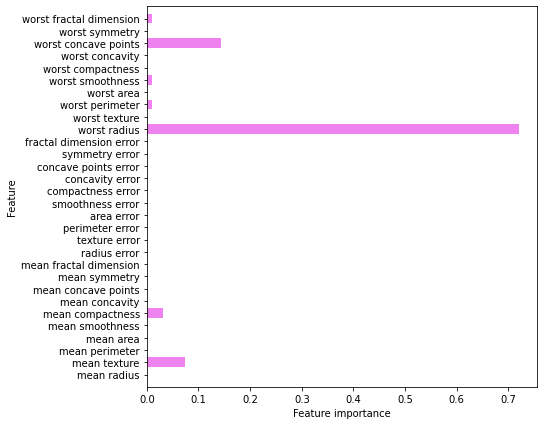

In [16]:
def feature_importances(model):
    plt.figure(figsize=(7,7))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color = "violet")
    plt.yticks(np.arange(n_features), data['feature_names'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

feature_importances(dtree)
plt.savefig('feature_importance')

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
print("Accuracy on training data : {:.2f}".format(round(rf.score(x_train, y_train)*100,2)))
print("Accuracy on test data     : {:.2f}".format(round(rf.score(x_test, y_test)*100,2)))

Accuracy on training data : 100.00
Accuracy on test data     : 97.90


### Feature importance in Random Forest

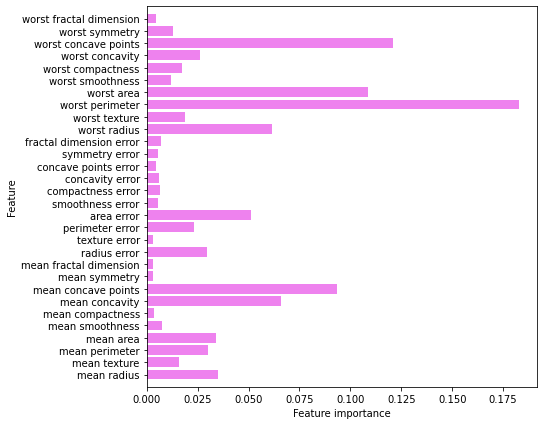

In [19]:
feature_importances(rf)

# Support Vector Machine

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training data : {:.2f}".format(round(svc.score(x_train, y_train)*100,2)))
print("Accuracy on test data     : {:.2f}".format(round(svc.score(x_test, y_test)*100,2)))

Accuracy on training data : 91.31
Accuracy on test data     : 94.41


### Scaling the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [22]:
svc = SVC()
svc.fit(scaled_x_train, y_train)

print("Accuracy on training data : {:.2f}".format(round(svc.score(scaled_x_train, y_train)*100,2)))
print("Accuracy on test data     : {:.2f}".format(round(svc.score(scaled_x_test, y_test)*100,2)))

Accuracy on training data : 97.89
Accuracy on test data     : 90.21
